# Example 11-8: Higher-order Runge-Kutta

Now that we have a second-order accurate algorithm, why stop there? 
We can use the same framework to build successively higher-order approximations.
These solutions fall into a family of algorithms known as [**Runge-Kutta methods**](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_method), which are very popular for solving ODEs.
Understand why they work as well as their implementation is a key aspects of this course.

## Summary of commands

No new commands are demonstrated in this exercise, but we will expand on [Example 11-7](11-7_heun_demo) to build fourth-order Runge-Kutta methods.

## Runge-Kutta methods

The hierarchy of Runge-Kutta methods come with tradeoffs, and the fourth-order Runge-Kutta method (RK4) provides a good balance between computational cost and accuracy.
It is often parameterized by the following:

$$ \begin{align}
k_1 &= f \left( t_n, y_n \right) \\
k_2 &= f \left( t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_1 \right) \\
k_3 &= f \left( t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_2 \right) \\
k_4 &= f \left( t_n + h, y_n + h k_3 \right) \\
y_{n+1} &= y_n + h \left( \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 \right)
\end{align} $$

---------------------------

Consider the following ODE:

$$ y' = -t y, \quad y(0) = 1, \quad 0 \le t \le 6.5 $$

which has an exact solution of $y = e^{-t^2/2}$.
We will use RK2 (Heun's method) and RK4 to solve the ODE using a step size of $h = 0.5$.

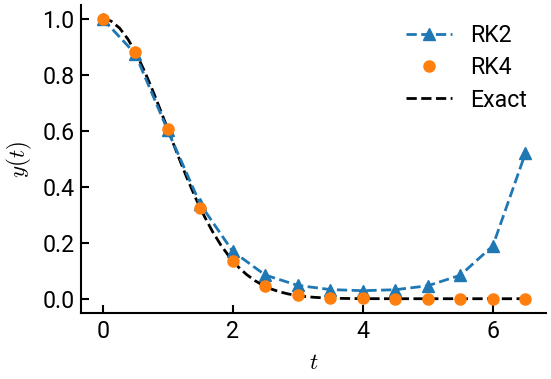

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

def my_func(t, y):
    return -t * y

def RK2Heun(f, t0, tf, y0, h):
    y = [y0]
    t = np.arange(t0, tf+h, h)
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h * k1)
        y.append(y[n] + 0.5 * h * (k1 + k2))
    return t, np.array(y)

def RK4(f, t0, tf, y0, h):
    y = [y0]
    t = np.arange(t0, tf+h, h)
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        y.append(y[n] + 1/6 * h * (k1 + 2 * k2 + 2 * k3 + k4))
    return t, np.array(y)

# constants
t0 = 0
tf = 6.5
y0 = 1
h = 0.5
t2, y_rk2 = RK2Heun(my_func, t0, tf, y0, h)
t4, y_rk4 = RK4(my_func, t0, tf, y0, h)
t = np.linspace(0, 6.5, 51)

# plot results
fig, ax = plt.subplots()
ax.plot(t2, y_rk2, '^--', lw=2, label='RK2')
ax.plot(t4, y_rk4, 'o', lw=2, label='RK4')
ax.plot(t, np.exp(-t ** 2 / 2), 'k--', lw=2, label='Exact', zorder=-5)
ax.set(xlabel='$t$', ylabel='$y(t)$')
ax.legend()
plt.show()

From which it is evident that RK2 begins to exhibit instability at $h = 0.5$ but RK4 remains stable.